In [14]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score, mean_squared_error

In [15]:
file = "./Daten/se_atlantic_df.csv"
df = pd.read_csv(file, index_col='time')
print(df)
print(f'Columns: \n {df.columns}') 

             lat  lon     clf   lwp         blh     cape     mlspf  \
time                                                                 
2011-01-02 -22.5  0.5  0.4090  42.0  1093.81670   0.0625  0.000000   
2011-01-02 -22.5  1.5  0.4736  84.0  1120.74900   0.0625  0.000000   
2011-01-02 -22.5  2.5  0.4375  78.0  1296.67750  23.3750  0.000000   
2011-01-02 -21.5  0.5  0.7204  45.0  1050.81710   0.0625  0.000000   
2011-01-02 -21.5  1.5  0.7309  35.0  1167.79440  23.3750  0.000000   
...          ...  ...     ...   ...         ...      ...       ...   
2019-12-31 -11.5  7.5  0.1795  53.0   781.37620   0.0625  0.000000   
2019-12-31 -11.5  8.5  0.2137  87.0   780.33594   0.0625  0.000000   
2019-12-31 -10.5  7.5  0.1584  44.0   824.37573   0.0625  0.014893   
2019-12-31 -10.5  8.5  0.0195  47.0   748.31740   0.0625  0.000000   
2019-12-31  -8.5  8.5  0.0186  69.0   736.18040  23.3750  0.000000   

                 mslhf      msshf      q700  ...      u850       v10  \
time             

C:\Users\satvi\AppData\Local\Temp\ipykernel_26548\1249566485.py:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(df['lwp'])


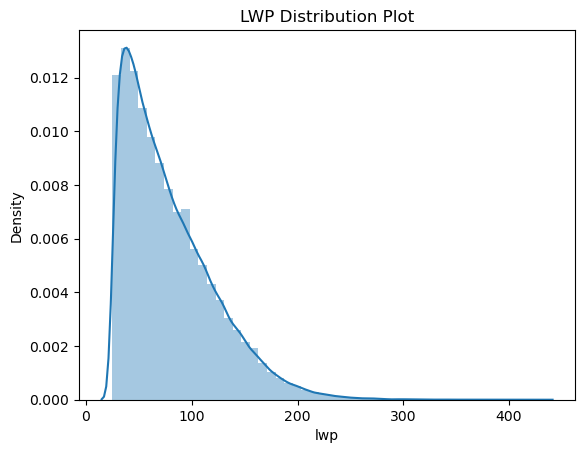

In [16]:
import seaborn as sns

# Data distribution
plt.title('LWP Distribution Plot')
sns.distplot(df['lwp'])
plt.show()

In [17]:
# defining input and output

X = df[['clf','blh', 'cape', 'mlspf', 'mslhf', 'msshf',
       'q700', 'q850', 'rh700', 'rh850', 'sst', 't700', 't850', 'tcwv', 'u10',
       'u700', 'u850', 'v10', 'v700', 'v850', 'w700', 'w850',
       'Terra_descending', 'lsm', 'eis', 'lnNd']] #all the input controlling factors
y = df['lwp'] #output cloud fraction

#from sklearn.model_selection import train_test_split #only needed for part2
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

Multiple linear regression: y =  78.9184523846001
 + 16.324441616540465 * clf
 + 9.462657963455083 * blh
 + 0.38954527975844266 * cape
 + 6.308465399001586 * mlspf
 + 2.353194643068462 * mslhf
 + -2.89386761598397 * msshf
 + -5.804389590978992 * q700
 + -1.801417284986678 * q850
 + -1.270166302866603 * rh700
 + 4.167638241190461 * rh850
 + 0.3654537268212277 * sst
 + -6.073232921224269 * t700
 + 2.366128913742511 * t850
 + 14.530916087009825 * tcwv
 + 0.8350631975900058 * u10
 + 0.9744100132683462 * u700
 + -2.1987085964249817 * u850
 + -3.5832092556684643 * v10
 + 0.7567310455041755 * v700
 + 2.607838657105793 * v850
 + 0.6463661713935696 * w700
 + -2.436911181081421 * w850
 + 2.252274322574709 * Terra_descending
 + 0.506661747765847 * lsm
 + 8.44675820551927 * eis
 + -16.11862402246276 * lnNd


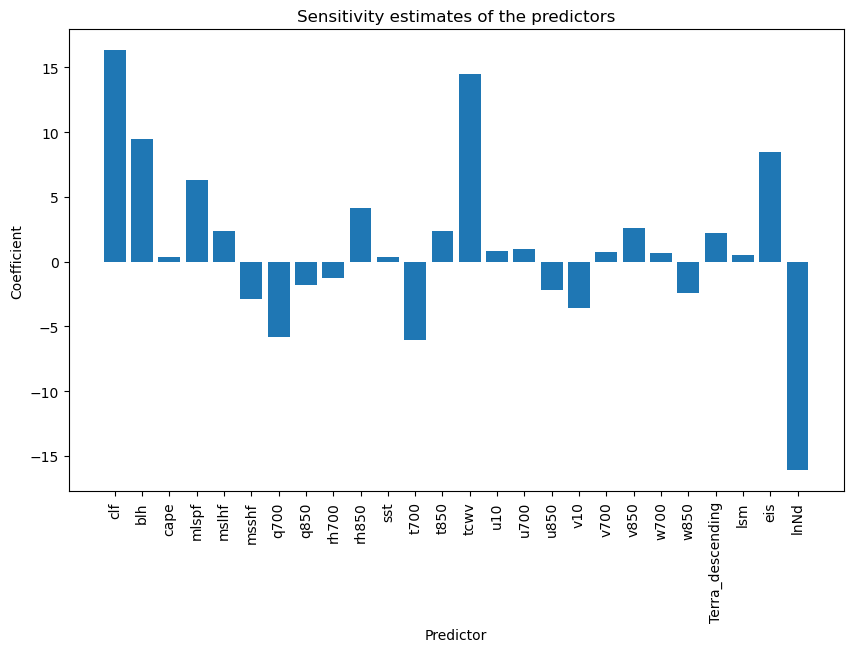

In [18]:
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression

# Preprocessing: standardizing the predictors using the given code
# X = df.drop(['clf'], axis=1)
# y = df.clf
X_standardized = StandardScaler().fit(X).transform(X)

# Perform multiple linear regression
mlr = LinearRegression()
mlr.fit(X_standardized, y)

# Print the intercept and coefficients in the same way as done for individual linea regression
print("Multiple linear regression: y = ", mlr.intercept_)
for i, col in enumerate(X.columns):
    print(f" + {mlr.coef_[i]} * {col}")

#Ploting the coefficients to visualise sensitivity estimates
coefs = mlr.coef_
names = X.columns
plt.figure(figsize=(10, 6))
plt.bar(names, coefs)
plt.xticks(rotation=90)
plt.title("Sensitivity estimates of the predictors")
plt.xlabel("Predictor")
plt.ylabel("Coefficient")
plt.show()

In [19]:
#TODO - The datasets above needs to be normalized

In [20]:
#computing correlation
df_corr = df.drop(['lat','lon'], axis=1)
corr = df_corr.corr()
corr.style.background_gradient(cmap='coolwarm')

,clf,lwp,blh,cape,mlspf,mslhf,msshf,q700,q850,rh700,rh850,sst,t700,t850,tcwv,u10,u700,u850,v10,v700,v850,w700,w850,Terra_descending,lsm,eis,lnNd
clf,1.000000,0.239185,-0.093230,-0.065991,0.235024,0.101043,-0.162047,0.013360,-0.121353,0.023331,-0.179188,-0.349448,-0.038901,0.194241,-0.120559,-0.081481,-0.189108,-0.181331,0.139696,-0.006241,-0.012795,-0.027273,-0.095681,-0.069146,-0.036159,0.253835,0.453626
lwp,0.239185,1.000000,0.129634,0.044604,0.166407,-0.073400,-0.066606,-0.063196,0.094267,-0.063696,0.201652,-0.108771,-0.031656,-0.232814,-0.014666,-0.210669,-0.065353,-0.210810,-0.007518,0.124554,0.177206,-0.002348,-0.087859,0.126207,-0.014909,0.157484,-0.288950
blh,-0.093230,0.129634,1.000000,-0.116767,-0.469632,-0.798897,-0.365597,-0.460167,-0.398110,-0.452511,-0.120381,-0.059966,-0.033860,-0.482884,-0.491355,-0.610769,0.220834,-0.270646,0.250496,0.110124,0.311561,0.075094,0.136640,0.243623,-0.069435,0.252336,-0.212990
cape,-0.065991,0.044604,-0.116767,1.000000,0.087201,0.077383,0.078142,0.149743,0.244016,0.142891,0.198779,0.197728,0.027837,0.001404,0.260393,0.072888,-0.063174,-0.006776,-0.048678,0.023593,-0.013635,-0.027890,-0.046065,-0.048421,-0.001183,-0.176745,-0.093705
mlspf,0.235024,0.166407,-0.469632,0.087201,1.000000,0.425218,0.118988,0.192494,0.246352,0.187559,0.117765,-0.127644,-0.000341,0.220432,0.220472,0.142119,-0.203161,-0.048863,0.013356,0.038036,-0.004946,-0.017326,-0.129955,-0.160789,0.025716,0.001702,0.098427
mslhf,0.101043,-0.073400,-0.798897,0.077383,0.425218,1.000000,0.688598,0.348438,0.218649,0.341846,0.025307,-0.217571,0.015070,0.339159,0.317649,0.558210,-0.115433,0.252784,-0.425682,-0.112832,-0.264059,-0.068534,-0.126356,-0.240427,0.047144,-0.036209,0.174047
msshf,-0.162047,-0.066606,-0.365597,0.078142,0.118988,0.688598,1.000000,0.282372,0.244428,0.263010,0.152448,-0.027527,0.133093,0.116052,0.332099,0.240914,-0.071349,0.085455,-0.420319,-0.032117,-0.110636,-0.026337,-0.044551,-0.028828,0.007554,-0.156549,-0.086161
q700,0.013360,-0.063196,-0.460167,0.149743,0.192494,0.348438,0.282372,1.000000,0.467902,0.988933,0.166096,0.320264,0.001847,0.514819,0.840528,0.371647,-0.340461,0.143795,-0.042802,-0.045814,-0.158291,-0.027286,-0.137516,-0.072627,0.014922,-0.506763,0.088589
q850,-0.121353,0.094267,-0.398110,0.244016,0.246352,0.218649,0.244428,0.467902,1.000000,0.447013,0.869352,0.525624,0.102625,-0.039579,0.767256,0.306824,-0.302723,0.075706,-0.187591,0.071625,-0.158084,-0.039699,-0.048276,0.007400,0.009787,-0.446682,-0.169190
rh700,0.023331,-0.063696,-0.452511,0.142891,0.187559,0.341846,0.263010,0.988933,0.447013,1.000000,0.151742,0.294403,-0.114444,0.506117,0.806602,0.364076,-0.317982,0.144035,-0.032790,-0.067523,-0.154928,-0.017440,-0.135230,-0.067367,0.015787,-0.541415,0.098919


In [21]:
#TODO - since its a time series data, make sure the training and test datasets are in different time periods to avoid correlation.
#splitting data into training and test
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
# Ensure the index is of datetime type for proper time-based splitting
df.index = pd.to_datetime(df.index)

# Define training and testing periods (modify as needed for your data)
train_period = ~df.index.year.isin([2015, 2018])  # Exclude 2015 and 2018 for training
test_period = df.index.year.isin([2015, 2018])    # Include only 2015 and 2018 for testing

# Split the dataset based on time periods
X_train, X_test = X.loc[train_period], X.loc[test_period]
y_train, y_test = y.loc[train_period], y.loc[test_period]

In [22]:
#Random split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

# Create a minimum and maximum processor object
min_max_scaler = preprocessing.MinMaxScaler()
# Create an object to transform the data to fit minmax processor
X_train_scaled = min_max_scaler.fit_transform(X_train)
X_test_scaled = min_max_scaler.transform(X_test)

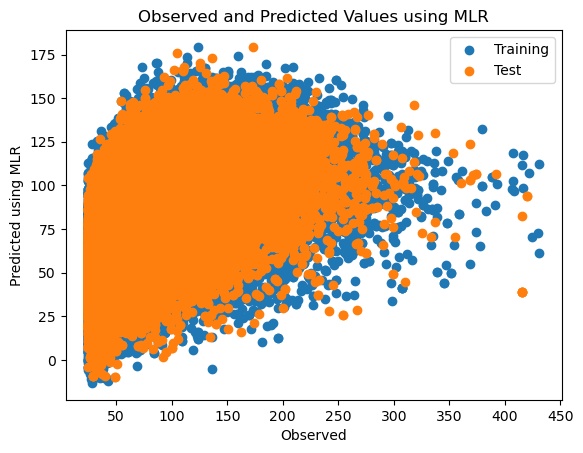

In [23]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train, y_train)

# Plot observed vs. predicted for training data
plt.scatter(y_train, mlr.predict(X_train), label='Training')

# Plot observed vs. predicted for test data
plt.scatter(y_test, mlr.predict(X_test), label='Test')

# Add labels and legend
plt.xlabel('Observed')
plt.ylabel('Predicted using MLR')
plt.title("Observed and Predicted Values using MLR")
plt.legend()
plt.show()


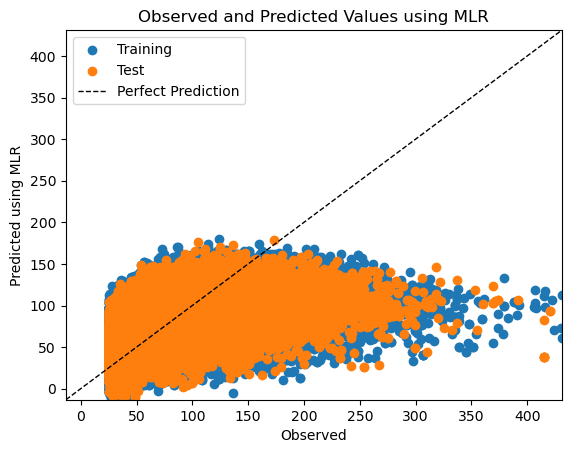

In [26]:
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

# Fit the linear regression model
mlr = LinearRegression()
mlr.fit(X_train, y_train)

# Get predictions for training and test data
y_train_pred = mlr.predict(X_train)
y_test_pred = mlr.predict(X_test)

# Plot observed vs. predicted for training data
plt.scatter(y_train, y_train_pred, label='Training')

# Plot observed vs. predicted for test data
plt.scatter(y_test, y_test_pred, label='Test')

# Set axis limits based on the combined range of observed and predicted values
min_val = min(y_train.min(), y_train_pred.min(), y_test.min(), y_test_pred.min())
max_val = max(y_train.max(), y_train_pred.max(), y_test.max(), y_test_pred.max())
plt.xlim(min_val, max_val)
plt.ylim(min_val, max_val)

# Add diagonal line for reference (perfect prediction line)
plt.plot([min_val, max_val], [min_val, max_val], 'k--', linewidth=1, label='Perfect Prediction')

# Add labels and legend
plt.xlabel('Observed')
plt.ylabel('Predicted using MLR')
plt.title("Observed and Predicted Values using MLR")
plt.legend()
plt.show()


D:\Software_Installed\Anaconda\envs\calisma\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


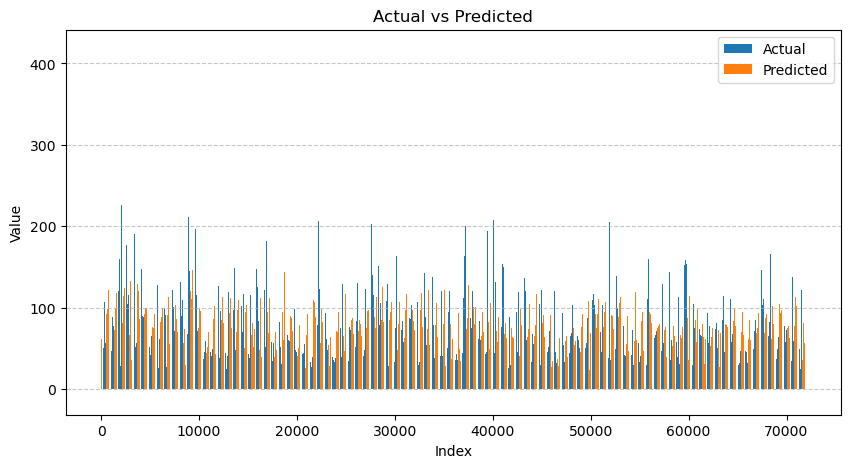

            Index  Actual   Predicted
time                                 
2015-01-01      0    61.0  107.764549
2015-01-01      1    39.0   95.522370
2015-01-01      2    44.0   76.112509
2015-01-01      3    39.0   92.113093
2015-01-01      4    75.0  119.486055
...           ...     ...         ...
2018-12-30  71951    80.0   63.486681
2018-12-30  71952    57.0   62.455657
2018-12-30  71953    83.0   65.060009
2018-12-30  71954    67.0   56.467032
2018-12-30  71955    37.0   72.148745

[71956 rows x 3 columns]


In [27]:
import matplotlib.pyplot as plt
import pandas as pd

# Visualize Side-by-Side: Graph
plt.figure(figsize=(10, 5))

# Bar plot
indices = range(len(y_test))
plt.bar(indices, y_test, width=0.4, label='Actual', align='center')
plt.bar([i + 0.4 for i in indices], y_pred_test, width=0.4, label='Predicted', align='center')

plt.xlabel('Index')
plt.ylabel('Value')
plt.title('Actual vs Predicted')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

# Visualize Side-by-Side: Table
data = {'Index': range(len(y_test)), 'Actual': y_test, 'Predicted': y_pred_test}
df = pd.DataFrame(data)

# Display the table
print(df)


In [24]:


#Accuracy Assessment by comparing the model generated independent test data
y_pred_test = mlr.predict(X_test)
# Calculate accuracy
r2 = r2_score(y_test, y_pred_test)
print(f"R-Squared MLR: {r2}")
# Calculate RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
print(f"RMSE MLR: {rmse}")

#side by side


R-Squared MLR: 0.32165630402687984
RMSE MLR: 34.67858506665641


In [25]:
# np.set_printoptions(precision = 2)
# result = np.concatenate((y_pred_test.reshape(len(y_test), 1), y_test.reshape(len(y_test), 1)), 1)
# result